In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
N = 100
D = 2

X = np.random.randn(N, D)
bias = np.array([[1] * N]).T
Xb = np.concatenate((bias, X), axis=1)
weights = np.random.randn(D + 1)
z = Xb.dot(weights)

def sigmoid(z):
    return 1 / (1 * np.exp(-z))

print ('Sigmoid: {}'.format(z))

Sigmoid: [  1.53516519e+00   3.39949051e+00   1.08591604e+00  -1.20401978e+00
   3.46871369e+00   1.95968000e+00  -8.91709911e-02   1.67680768e+00
   8.61625339e-01   6.68141551e-01   4.21403824e-01   1.28147250e+00
   2.24511416e+00   4.04190559e-01   1.47152493e+00  -1.29601912e+00
   1.79028145e+00   1.19921087e-04  -1.72431688e-01   6.46328878e-01
   7.47996282e-02   1.27648721e+00   1.78605226e+00   1.26411383e+00
   8.35146273e-01  -1.06495880e+00   7.54577241e-01   2.54207673e+00
   3.38956636e+00   4.05524942e-01   6.61200098e-01  -2.19294214e-01
   2.60469273e+00   8.77818693e-01   1.96951205e+00   3.23140328e-01
  -2.00886533e-01  -2.00346126e+00   5.25557059e+00   5.27633705e-01
   1.66354683e+00   9.53966749e-01   1.38903490e+00   1.96223292e+00
  -9.11280153e-01   7.55969105e+00  -2.75493234e+00   2.08480463e+00
   9.72218248e-01   2.82616688e+00   2.07529411e+00  -1.80560210e-01
  -4.74519215e-01   2.35761250e+00  -4.51405567e-01   7.00104883e-01
   1.41923003e+00   2.724

In [3]:
# eCommerce project

def get_data():
    """
    Reading in the CSV file, and then proceed to perform 
    normalization on some variables and one-hot encoding
    on some features
    """
    df = pd.read_csv('ecommerce_data.csv')
    data = df.as_matrix()
    
    X = data[:, :-1]
    Y = data[:, -1]
    print(df.columns)
    
    # Normalization on products viewed and visit duration
    X[:, 1] = (X[:, 1] - np.average(X[:, 1])) / np.std(X[:, 1])
    X[:, 2] = (X[:, 2] - np.average(X[:, 2])) / np.std(X[:, 2])
    
    # Handling categorical value (time of day)
    N, D = X.shape
    new_X = np.zeros((N, D + 3))
    new_X[:, 0:(D - 1)] = X[:, 0:(D - 1)]
    
    for n in range(N):
        t = int(X[n, D - 1])
        new_X[n, t + D - 1] = 1
        
    return new_X, Y

def get_binary_data():
    X, Y = get_data()
    X2 = X[Y <= 1]
    Y2 = Y[Y <= 1]
    return X2, Y2

In [4]:
X, Y = get_binary_data()

dimension = X.shape[1]
weights = np.random.randn(dimension)
bias = 0

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def forward(X, weights, bias):
    return sigmoid(X.dot(weights) + bias)

prob_y_given_x = forward(X, weights, bias)
predictions = np.round(prob_y_given_x)

def error_rate(predicted, actual):
    return np.mean(predicted == actual)

print('Score: {}'.format(error_rate(predictions, Y)))

Index([u'is_mobile', u'n_products_viewed', u'visit_duration',
       u'is_returning_visitor', u'time_of_day', u'user_action'],
      dtype='object')
Score: 0.658291457286


In [5]:
# Cross-entropy
N = 100
D = 2

np.random.seed(40)

X = np.random.randn(N, D)
X[:50, :] = X[:50, :] - 2 * np.ones((50, D))
X[50:, :] = X[50:, :] + 2 * np.ones((50, D))

T = np.array([0] * 50 + [1] * 50)

ones = np.array([[1] * N]).T
Xb = np.concatenate((ones, X), axis=1)

weights = np.random.randn(D + 1)
z = Xb.dot(weights)

Y = sigmoid(z)

def cross_entropy_error(actual, predicted):
    total_error = 0
    for i in range(N):
        if actual[i] == 1:
            total_error -= np.log(predicted[i])
        else:
            total_error -= np.log(1 - predicted[i])
    return total_error

cross_entropy_error(T, Y)

92.465898895446045

In [6]:
weights = np.array([0, 4, 4])
z = Xb.dot(weights)
Y = sigmoid(z)

cross_entropy_error(T, Y)

0.094873631707782333

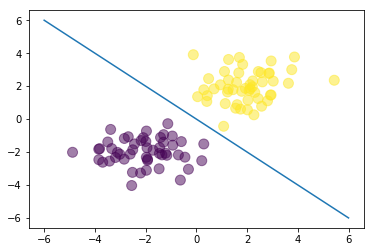

In [7]:
plt.scatter(X[:,0], X[:,1], c=T, s=100, alpha=0.5)
x_axis = np.linspace(-6, 6, 100)
y_axis = -x_axis
plt.plot(x_axis, y_axis)

In [8]:
# Batch gradient descent
N = 100
D = 2

X = np.random.randn(N, D)
X[:50, :] = X[:50, :] - 2 * np.ones((50, D))
X[50:, :] = X[50:, :] + 2 * np.ones((50, D))

T = np.array([0] * 50 + [1] * 50)

ones = np.array([[1] * N]).T
Xb = np.concatenate((ones, X), axis=1)

weights = np.random.randn(D + 1)
z = Xb.dot(weights)

Y = sigmoid(z)

learning_rate = 0.1

for _ in range(100):
    if _ % 10 == 0:
        print(cross_entropy_error(T, Y))
    weights += learning_rate * Xb.T.dot(T - Y)
    Y = sigmoid(Xb.dot(weights))
    
print('Final weight: {}'.format(weights))

177.918685405
2.06028112936e-06
2.06027364599e-06
2.06026616252e-06
2.06025867894e-06
2.06025119535e-06
2.06024371188e-06
2.0602362284e-06
2.06022874504e-06
2.0602212619e-06
Final weight: [ -0.84027878  11.82857988  12.60348077]


Index([u'is_mobile', u'n_products_viewed', u'visit_duration',
       u'is_returning_visitor', u'time_of_day', u'user_action'],
      dtype='object')
iteration 0 train cost 1.05846211401 test cost 0.992389725838
iteration 1000 train cost 0.106927450778 test cost 0.268598409929
iteration 2000 train cost 0.0973644698491 test cost 0.281620291034
iteration 3000 train cost 0.0942508246343 test cost 0.291398968956
iteration 4000 train cost 0.0928419772569 test cost 0.298778426931
iteration 5000 train cost 0.0921060416328 test cost 0.30448317834
iteration 6000 train cost 0.091688636774 test cost 0.308970324796
iteration 7000 train cost 0.0914389771481 test cost 0.312545740378
iteration 8000 train cost 0.0912840587707 test cost 0.315423213306
iteration 9000 train cost 0.091185335356 test cost 0.317757107076
Final training accuracy: 0.974874371859
Final test accuracy: 0.959798994975


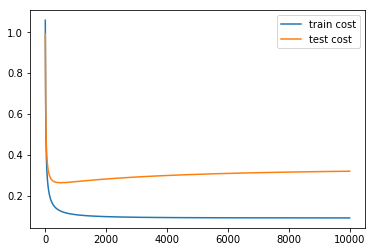

In [9]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X, Y = get_binary_data()
X, Y = shuffle(X, Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=40)

D = X.shape[1]
weights = np.random.randn(D)
bias = 0

def cross_entropy(actual, prob_Y):
    return -np.mean(actual * np.log(prob_Y) + (1 - actual) * np.log(1 - prob_Y))

train_cost_list = []
test_cost_list = []
learning_rate = 0.001

for _ in range(10000):
    train_prediction = forward(X_train, weights, bias)
    test_prediction = forward(X_test, weights, bias)
    
    train_cost = cross_entropy(y_train, train_prediction)
    test_cost = cross_entropy(y_test, test_prediction)
    
    train_cost_list.append(train_cost)
    test_cost_list.append(test_cost)
    
    weights -= learning_rate * X_train.T.dot(train_prediction - y_train)
    bias -= learning_rate * (train_prediction - y_train).sum()
    
    if _ % 1000 == 0:
        print('iteration {} train cost {} test cost {}'.format(_, train_cost, test_cost))

print('Final training accuracy: {}'.format(error_rate(np.round(train_prediction), y_train)))
print('Final test accuracy: {}'.format(error_rate(np.round(test_prediction), y_test)))

plt.plot(train_cost_list, label='train cost')
plt.plot(test_cost_list, label='test cost')
plt.legend()

In [10]:
# Batch gradient descent with L2 regularization
N = 100
D = 2

X = np.random.randn(N, D)
X[:50, :] = X[:50, :] - 2 * np.ones((50, D))
X[50:, :] = X[50:, :] + 2 * np.ones((50, D))

T = np.array([0] * 50 + [1] * 50)

ones = np.array([[1] * N]).T
Xb = np.concatenate((ones, X), axis=1)

weights = np.random.randn(D + 1)
z = Xb.dot(weights)

Y = sigmoid(z)

learning_rate = 0.1
regularization = 0.1

for _ in range(100):
    if _ % 10 == 0:
        print(cross_entropy_error(T, Y))
    weights += learning_rate * (Xb.T.dot(T - Y) - 0.1 * weights)
    Y = sigmoid(Xb.dot(weights))
    
print('Final weight: {}'.format(weights))

71.9938596377
8.60523323662
6.46285236465
4.92260052349
4.00344415076
3.62197945465
3.53237128399
3.52965661376
3.54445968421
3.55873246723
Final weight: [ 0.5900398   1.76534898  2.25584749]


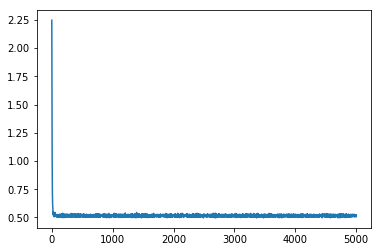

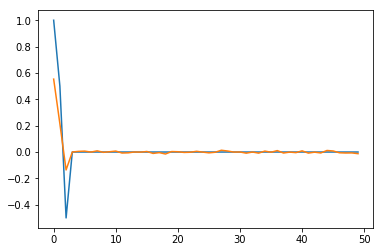

In [11]:
# L1 regularization

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

N = 50
D = 50

X = (np.random.random((N, D)) - 0.5) * 10
true_weights = np.array([1, 0.5, -0.5] + [0] * (D - 3))
Y = np.round(sigmoid(X.dot(true_weights) + np.random.randn(N) * 0.5))

costs = []
weights = np.random.randn(D) / np.sqrt(D)
learning_rate = 0.001
regularization = 10.0

for t in range(5000):
    Y_hat = sigmoid(X.dot(weights))
    delta = Y_hat - Y
    weights -= learning_rate * (X.T.dot(delta) + regularization * np.sign(weights))
    
    cost = -(Y * np.log(Y_hat) + (1 - Y) * np.log(1 - Y_hat)).mean() + regularization * np.abs(weights).mean()
    costs.append(cost)

plt.plot(costs)
plt.show()

plt.plot(true_weights, label='True weights')
plt.plot(weights, label='Predicted weights')